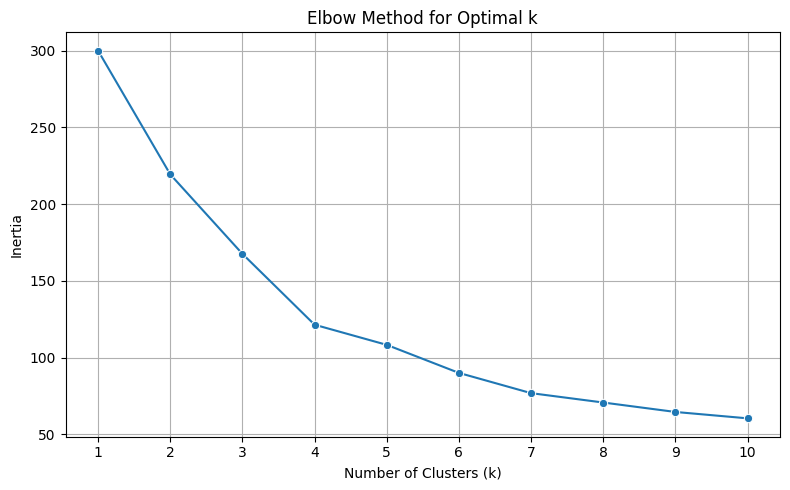

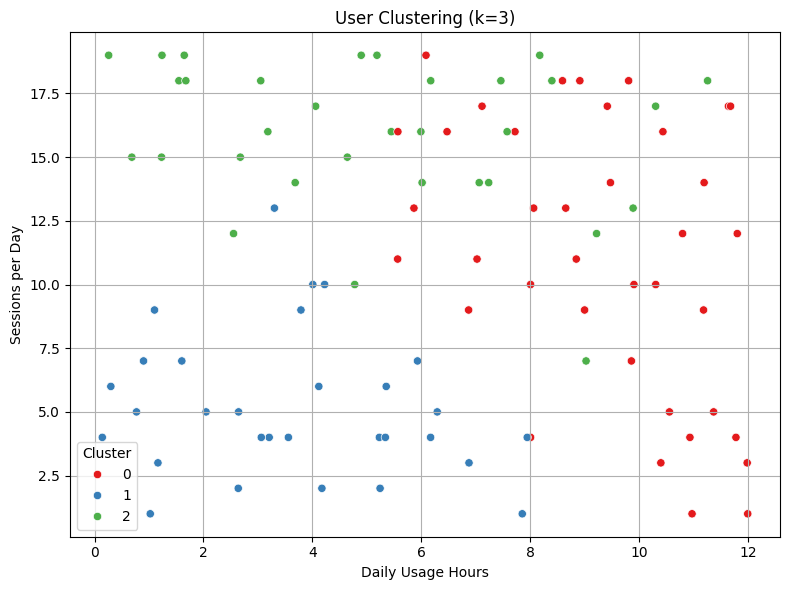

Cluster Centers:
   daily_usage_hours  site_categories_visited  sessions_per_day
0           9.307566                 6.631579         11.131579
1           3.666101                 5.166667          5.200000
2           5.192716                 3.218750         15.875000


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("internet_usage.csv")

# Step 2: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_range, y=inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Apply KMeans with chosen number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='daily_usage_hours', y='sessions_per_day', hue='Cluster', palette='Set1')
plt.title(f'User Clustering (k={optimal_k})')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Sessions per Day')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Display the cluster centers in original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])
print("Cluster Centers:")
print(cluster_centers_df)
